# Contours Demo

## Building from the scatter demo

In [3]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.cm as cm
from scipy import stats

%matplotlib inline

## Read in the data

*I'm using pandas*

In [4]:
c90 = pd.read_csv('congress90.csv')
c90

,name,x,alt
0,JOHNSON,-0.337,-0.035
1,EDWARDS J.,0.177,0.161
2,DICKINSON,0.398,-0.057
3,ANDREWS G.,-0.030,1.000
4,NICHOLS,-0.042,0.872
...,...,...,...
533,BYRD R.,-0.309,0.729
534,PROXMIRE,-0.598,0.801
535,NELSON,-0.567,0.198
536,HANSEN,0.489,-0.036


In [5]:
c114 = pd.read_csv('congress114.csv')
c114

,name,x,alt
0,BYRNE,0.535,0.328
1,ROBY,0.360,0.765
2,ROGERS,0.333,0.510
3,ADERHOLT,0.358,0.688
4,BROOKS,0.593,-0.348
...,...,...,...
534,CAPITO,0.255,0.090
535,JOHNSON,0.589,-0.250
536,BALDWIN,-0.550,-0.248
537,ENZI,0.541,0.228


## Let's try contours to show these two datasets on one figure

*We will need to make some density estimation of our data.  Let's use a <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gaussian_kde.html">Gaussian KDE</a>*

In [9]:
#I took this from here : https://stackoverflow.com/questions/33793701/pyplot-scatter-to-contour-plot
#which follows closely to the Gaussian KDE scipy page linked above
def density_estimation(x, y, xmin=-1, xmax=1, ymin=-1, ymax=1):
    xgrid, ygrid = np.mgrid[xmin:xmax:110j, ymin:ymax:110j]                                                     
    positions = np.vstack([xgrid.ravel(), ygrid.ravel()])                                                       
    values = np.vstack([x, y])                                                                        
    kernel = stats.gaussian_kde(values)                                                                 
    zgrid = np.reshape(kernel(positions).T, xgrid.shape)
    return xgrid, ygrid, zgrid

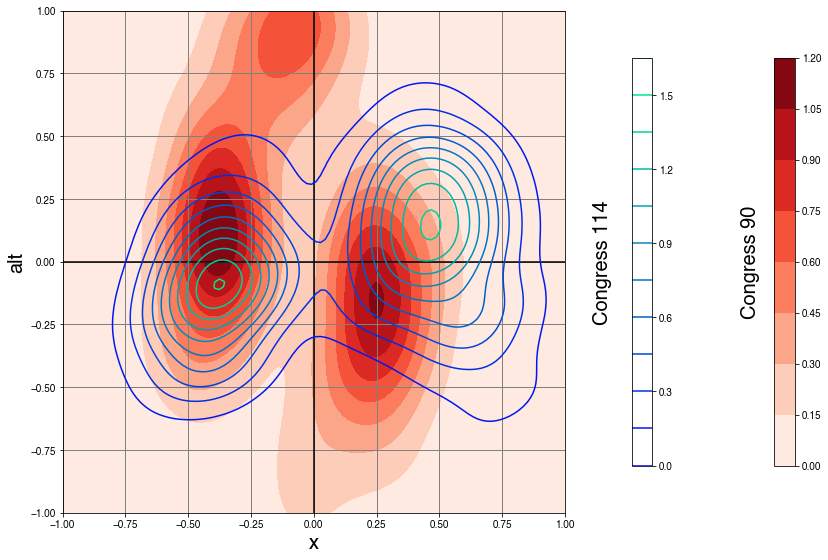

In [7]:
xmin=-1
xmax=1
ymin=-1
ymax=1
#use the function above to bin the data
x90, y90, z90 = density_estimation(c90['x'], c90['alt'], xmin, xmax, ymin, ymax)
x114, y114, z114 = density_estimation(c114['x'], c114['alt'], xmin, xmax, ymin, ymax)

#maybe we want one of the contours to be filled
f,ax = plt.subplots(figsize = (15,15))
ax.set_aspect('equal')
cs90 = ax.contourf(x90, y90, z90, 10, cmap = cm.Reds,  zorder = 1)
cs114 = ax.contour(x114, y114, z114, 10, cmap = cm.winter,  zorder = 4)  

#add a grid?
t = np.arange(9)/4. - 1
ax.set_yticks(t)
ax.set_xticks(t)
ax.grid(color='gray', linestyle='-', linewidth=1, zorder = 2)
ax.plot([0,0],[-2,2], color='black', zorder = 3)
ax.plot([-2,2],[0,0], color='black', zorder = 3)

#add color bars
cb90 = f.colorbar(cs90, ax=ax, shrink=0.5)
cb114 = f.colorbar(cs114, ax=ax, shrink=0.5, pad = 0.1)
cb90.ax.set_ylabel('Congress 90', labelpad=-80, fontsize=20)
cb114.ax.set_ylabel('Congress 114', labelpad=-80, fontsize=20)

#add axes labels, and define the limits
ax.set_xlabel('x', fontsize=20)
ax.set_ylabel('alt',fontsize=20)
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

f.savefig('contour.pdf',format='pdf', bbox_inches = 'tight') 

## Instead, let's plot the difference of the two KDEs

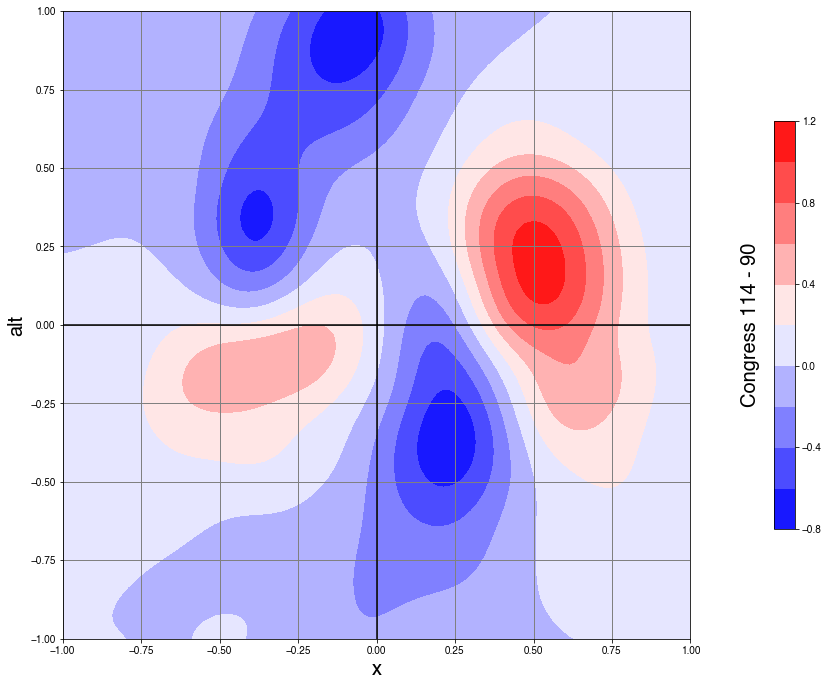

In [8]:
f,ax = plt.subplots(figsize = (15,15))
ax.set_aspect('equal')

zdiff = []
for z1, z2 in zip(z90, z114):
    zdiff.append(z2-z1)
cs = plt.contourf(x114, y114, zdiff, 10, cmap = cm.bwr,  zorder = 1)  
    
#add a grid?
t = np.arange(9)/4. - 1
ax.set_yticks(t)
ax.set_xticks(t)
ax.grid(color='gray', linestyle='-', linewidth=1, zorder = 2)
ax.plot([0,0],[-2,2], color='black', zorder = 3)
ax.plot([-2,2],[0,0], color='black', zorder = 3)

#add color bars
cb114 = f.colorbar(cs, ax=ax, shrink=0.5, pad = 0.1)
cb114.ax.set_ylabel('Congress 114 - 90', labelpad=-80, fontsize=20)

#add axes labels, and define the limits
ax.set_xlabel('x', fontsize=20)
ax.set_ylabel('alt',fontsize=20)
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

f.savefig('contour2.pdf',format='pdf', bbox_inches = 'tight') 
